In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/MyDrive/dataset/Salary Data.csv

In [ ]:
import pandas as pd
import glob

In [ ]:

# paths = glob.glob('/content/drive/MyDrive/**/*Salary*.csv', recursive=True)
# paths

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset/Salary Data.csv")

# Basic EDA


In [ ]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.shape

(375, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:

# replacing null values ( if there are more missing values )
#data=data["Age"].fillna(data["Age"].mean(),inplace=True)

In [ ]:
data.shape

(373, 6)

In [ ]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Exploratory Data analysis

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

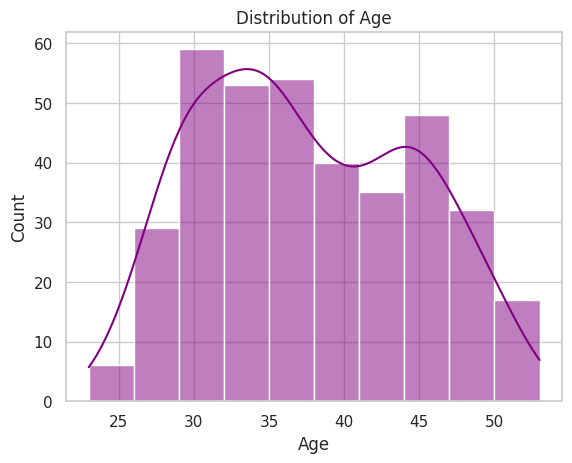

In [ ]:
sns.set_theme(style="whitegrid")
sns.histplot(data["Age"],kde=True, color="Purple")
plt.title("Distribution of Age")
plt.show()

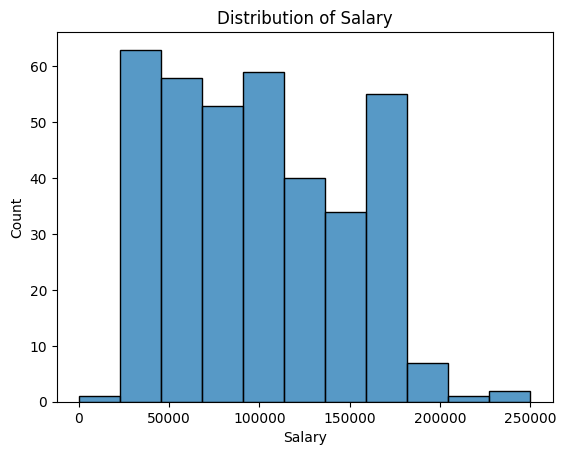

In [ ]:
sns.histplot(data["Salary"])
plt.title("Distribution of Salary")
plt.show()

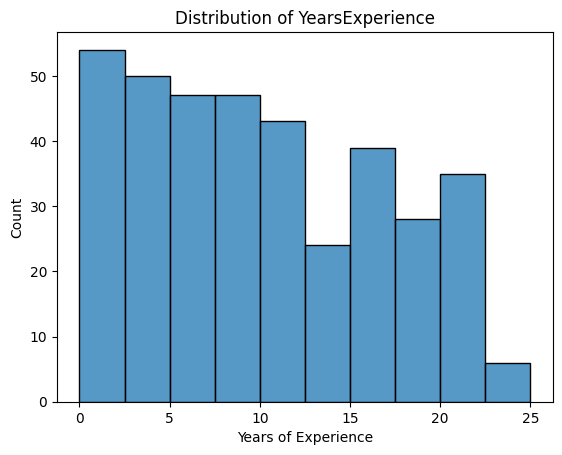

In [ ]:
sns.histplot(data["Years of Experience"])
plt.title("Distribution of YearsExperience")
plt.show()

In [ ]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

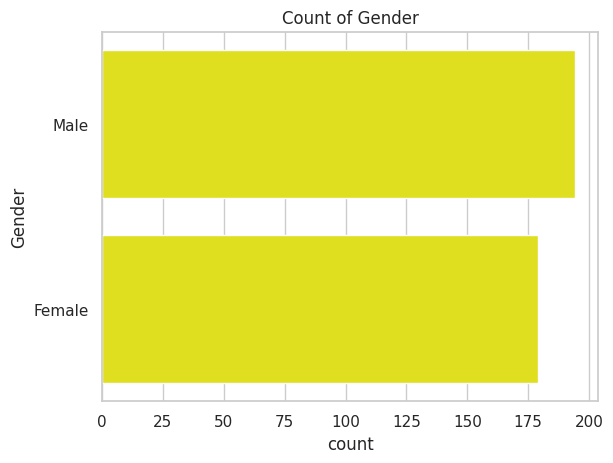

In [ ]:
'''
sns.histplot(data["Age"])
plt.title("Distribution of Age")
plt.show()
'''

sns.countplot(data["Gender"], color="Yellow")
plt.title("Count of Gender")
plt.show()

In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,194
Female,179


In [ ]:
data["Education Level"].value_counts()

,count
Education Level,
Bachelor's,224
Master's,98
PhD,51


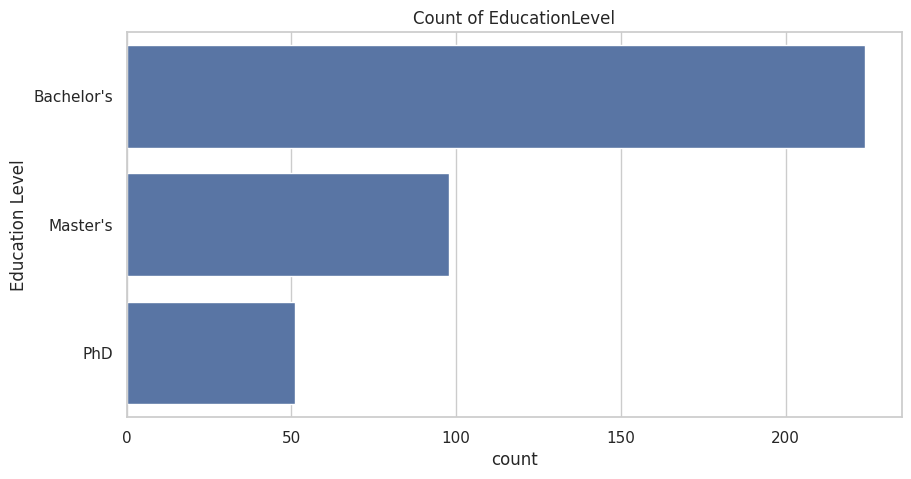

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data["Education Level"])
plt.title("Count of EducationLevel")
plt.show()

In [ ]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

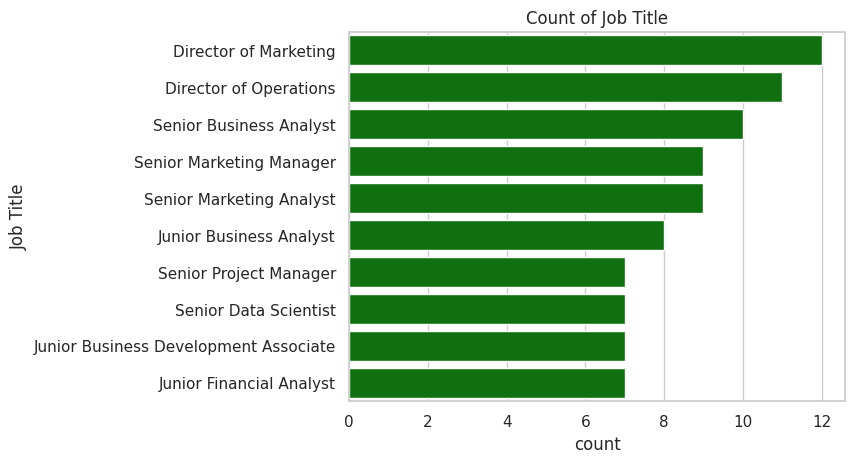

In [ ]:
sns.countplot(data["Job Title"], order=data["Job Title"].value_counts().nlargest(10).index, color="Green")
plt.title("Count of Job Title")
plt.show()

In [ ]:
data.skew(numeric_only=True)

,0
Age,0.197522
Years of Experience,0.361220
Salary,0.400578


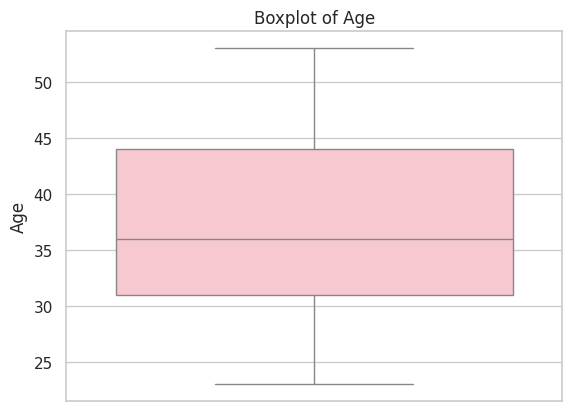

In [ ]:
sns.boxplot(data["Age"],color="pink")
plt.title("Boxplot of Age")
plt.show()

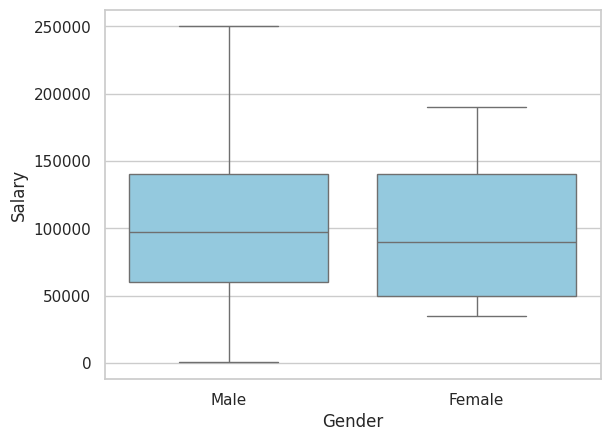

In [ ]:
sns.boxplot(data=data, x="Gender",y="Salary", color = "Skyblue")
plt.show()

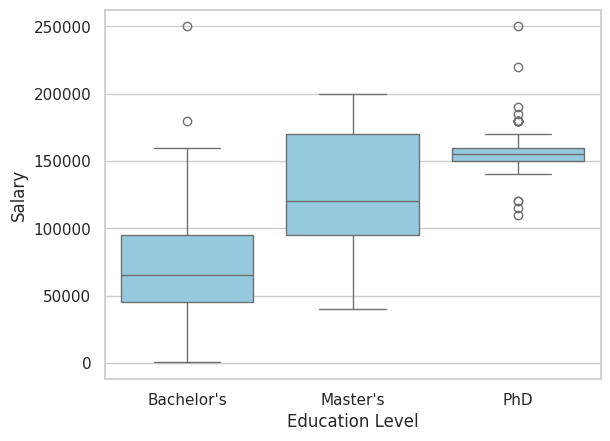

In [ ]:
sns.boxplot(data=data, x="Education Level",y="Salary", color = "Skyblue")
plt.show()

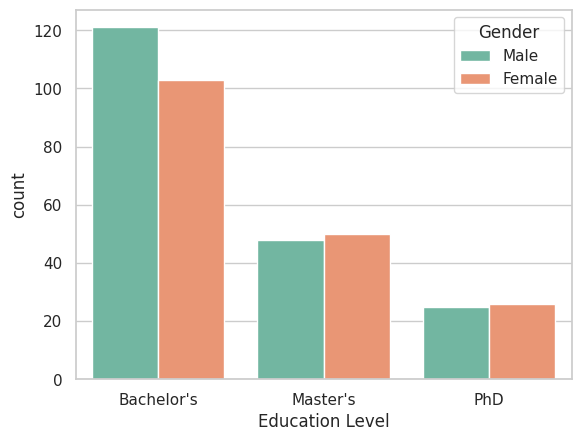

In [ ]:
sns.countplot(data=data,x="Education Level", hue="Gender", palette="Set2")
plt.show()

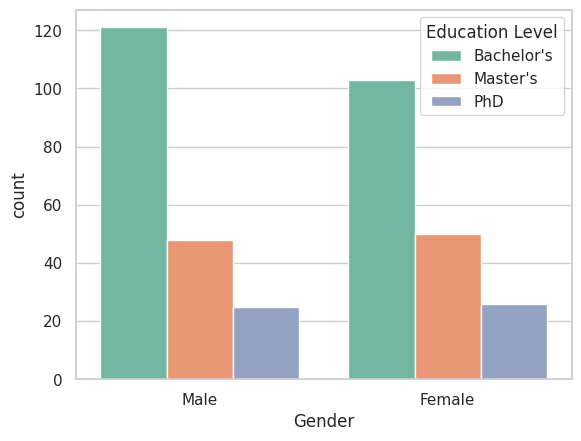

In [ ]:
sns.countplot(data=data,hue="Education Level", x="Gender", palette="Set2")
plt.show()

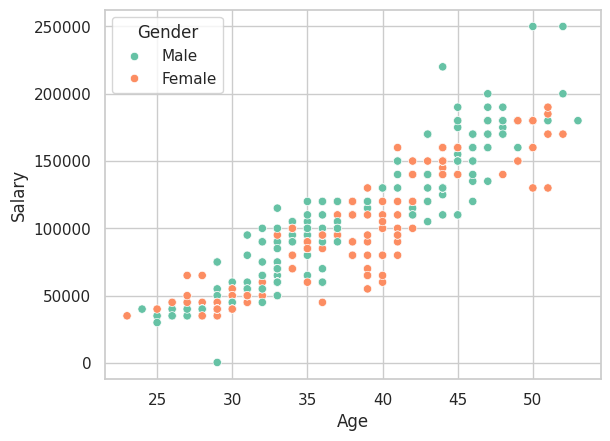

In [ ]:
sns.scatterplot(data=data,x="Age",y="Salary" ,hue="Gender",palette="Set2")
plt.show()

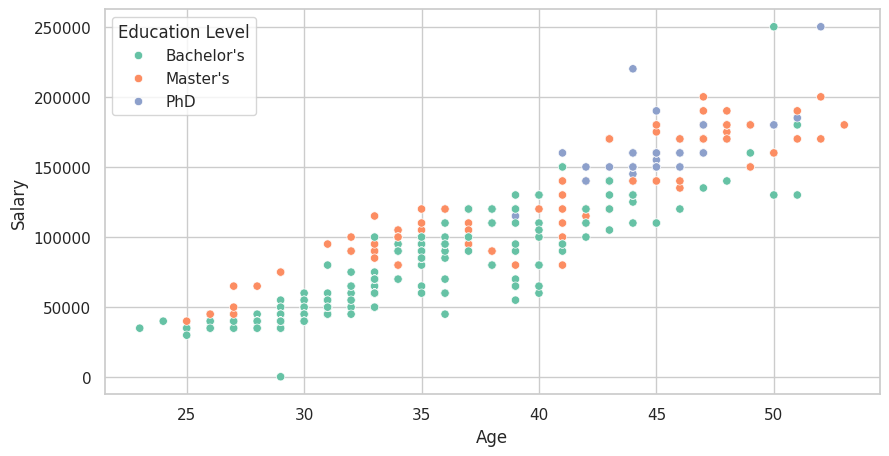

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,hue="Education Level",y="Salary" ,x="Age",palette="Set2")
plt.show()

In [ ]:
sns.heatmap(data.corr())
plt.show()

ValueError: could not convert string to float: 'Male'

# Preprocessing of data


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
data["Gender"]=le.fit_transform(data["Gender"])

In [ ]:
data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0


In [ ]:
data["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
data["Education Level"]= le.fit_transform(data["Education Level"])
data["Job Title"]= le.fit_transform(data["Job Title"])

In [ ]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    int64  
 2   Education Level      373 non-null    int64  
 3   Job Title            373 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 20.4 KB


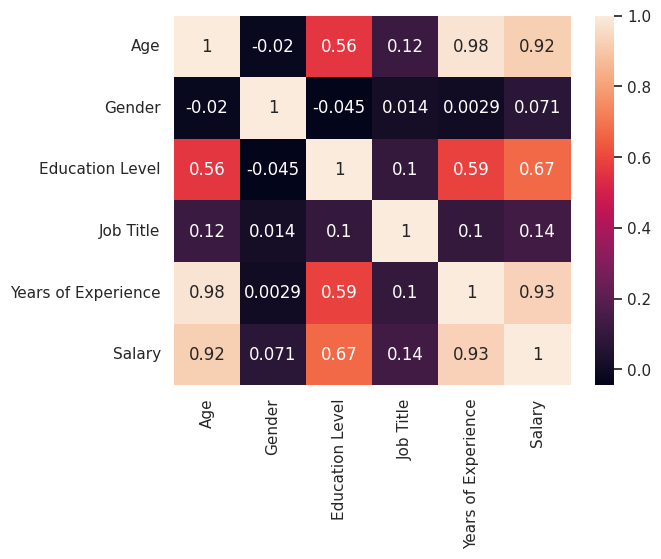

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# scaling
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()

In [ ]:
# data["Aage"]=rs.fit_transform(data["Aage"])


In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split


In [ ]:
x=data.drop("Salary",axis=1)
y=data["Salary"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#logistic regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  10928.921486231397
MSE is  249075656.42722148
R2 is  0.8961138207821864


In [ ]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr=dtr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2 = r2_score(y_test,y_pred_dtr)

print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  10066.666666666666
MSE is  231666666.66666666
R2 is  0.9033748813619646


In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

y_pred_rfr=rfr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2 = r2_score(y_test,y_pred_rfr)

print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  8524.791
MSE is  143564355.423075
R2 is  0.9401211962232473


In [ ]:
importances=rfr.feature_importances_
features = x.columns

In [ ]:
print(importances)

[0.58317457 0.00315825 0.02668221 0.11573017 0.2712548 ]


In [ ]:
fea_imp= pd.DataFrame({"Feature":features,"Importance":importances})

In [ ]:
fea_imp.head()

,Feature,Importance
0,Age,0.583175
1,Gender,0.003158
2,Education Level,0.026682
3,Job Title,0.115730
4,Years of Experience,0.271255


In [ ]:
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [ ]:
fea_imp.head()

,Feature,Importance
0,Age,0.583175
4,Years of Experience,0.271255
3,Job Title,0.115730
2,Education Level,0.026682
1,Gender,0.003158


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

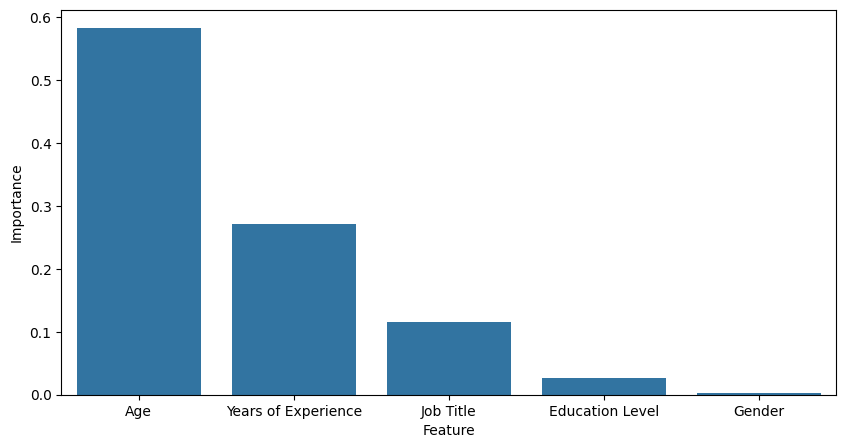

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=fea_imp,x="Feature",y="Importance")
plt.show()